## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Sean Meade

Student ID: 10128291

<hr style="border:2px solid gray"> </hr>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [2]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [3]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [4]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [5]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

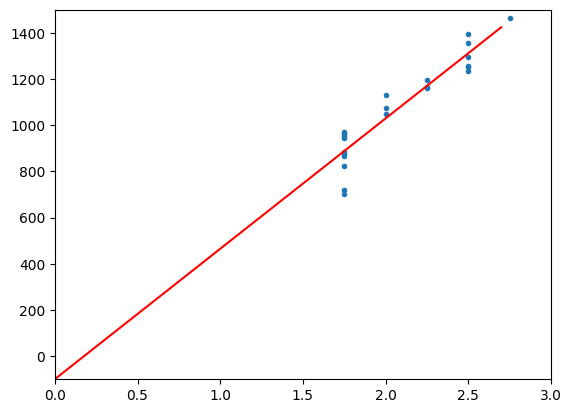

In [6]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

In [7]:
# TODO: 
# - Comment code for 3 function
# - error handling for 3 function
# - test add
# - test mult
# - test transpose
# - test determinant_2x2
# - test inverse
a = [[4, 3], [7, -2]]
b = [[-1, 8], [2, 5]]
a4 = [[4, -2, -81, 7], [22, 0, 12, 3], [5, 6, 9, 21], [7, 13, 21, 2]]
b4 = [[5, 8, 25, 8], [7, -9, 35, 8], [4, 3, 19, 0], [6, 16, 20, 7]]
a32 = [[1, 2], [3, 4], [5, 6]]
b32 = [[9, 8], [7, 6], [5, 4]]
a_odd = [[1, 2, 3], [2, 3]]
b_odd = [[5, 1, -5, 8], [1, 0, 2, 6]]

Given two matrices with the same number of rows and same number of columns for example A and B:

$$A = \begin{bmatrix} a_{11} & a_{12} & \ldots & a_{1n} \\ a_{21} & a_{22} & \ldots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \ldots & a_{mn} \end{bmatrix} $$

$$ B = \begin{bmatrix} b_{11} & b_{12} & \ldots & b_{1n} \\ b_{21} & b_{22} & \ldots & b_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ b_{m1} & b_{m2} & \ldots & b_{mn} \end{bmatrix}
 $$

You can add the two together with the following method:

$$ C = A + B = \begin{bmatrix} a_{11} + b_{11} & a_{12} + b_{12} & \ldots & a_{1n} + b_{1n} \\ a_{21} + b_{21} & a_{22} + b_{22} & \ldots & a_{2n} + b_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} + b_{m1} & a_{m2} + b_{m2} & \ldots & a_{mn} + b_{mn} \end{bmatrix} $$

Fairly straight forward operation of adding the elements in the same position from both matrices and adding that addition to the same position of a new matrix:


In [8]:
def add_matrices(matrix_a, matrix_b):
    """
    Adds two matrices of the same size.

    Args:
        matrix_a (list of list(s)): representing a matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

        matrix_b (list of list(s)): representing a matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

    Returns:
        added_matrix (list of list(s)): the addition of matrix_a and matrix_b to produce a matrix of the same size

    """

    # empty list for the result of addition
    added_matrix = []
    # check if they are the same size
    if len(matrix_a) == len(matrix_b) and len(matrix_a[0]) == len(matrix_b[0]):
        # for every column in matrix a
        for col in range(len(matrix_a)):
            # add a new empty list to hold the addition of that column for each matrix
            added_matrix.append([])
            # then for each row in each matrix column add the corresponding elements and add to the added matrix column
            for row in range(len(matrix_a[0])):
                try:
                    added_matrix[col].append(matrix_a[col][row] + matrix_b[col][row])
                except:
                    print("Something went wrong. Likely an element in one of the matrices is not a number.")
                    return
    
    else:
        print("These matrices are not the same size and cannot be added.")
        return

    return added_matrix

add_matrices(a, b)

[[3, 11], [9, 3]]

In [9]:
add_matrices(a, b) == np.add(a, b)

array([[ True,  True],
       [ True,  True]])

In [10]:
add_matrices(a4, b4) == np.add(a4, b4)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [11]:
add_matrices(a32, b32) == np.add(a32, b32)

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [12]:
# add_matrices(a_odd, b_odd) == np.add(a_odd, b_odd)

You can apply a similar method to subtract these matrices:

$$ C = A - B = \begin{bmatrix} a_{11} - b_{11} & a_{12} - b_{12} & \ldots & a_{1n} - b_{1n} \\ a_{21} - b_{21} & a_{22} - b_{22} & \ldots & a_{2n} - b_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} - b_{m1} & a_{m2} - b_{m2} & \ldots & a_{mn} - b_{mn} \end{bmatrix} $$

Where instead of adding you are subtracting the elements in the same position from both matrices and adding that addition to the same position of a new matrix:


In [13]:
def subtract_matrices(matrix_a, matrix_b):
    """
    Subtracts two matrices of the same size.

    Args:
        matrix_a (list of list(s)): representing a matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

        matrix_b (list of list(s)): representing a matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

    Returns:
        subtracted_matrix (list of list(s)): the subtraction of matrix_b from matrix_a to produce a matrix of the same size

    """

    # empty list for the result of subtraction
    subtracted_matrix = []
    # check if they are the same size
    if len(matrix_a) == len(matrix_b) and len(matrix_a[0]) == len(matrix_b[0]):
         # for every column in matrix a
        for col in range(len(matrix_a)):
            # add a new empty list to hold the addition of that column for each matrix
            subtracted_matrix.append([])
            # then for each row in each matrix column add the corresponding elements and add to the added matrix column
            for row in range(len(matrix_a[0])):
                try:
                    subtracted_matrix[col].append(matrix_a[col][row] - matrix_b[col][row])
                except:
                    print("Something went wrong. Likely an element in one of the matrices is not a number.")
                    return

    else:
        print("These matrices cannot be subtracted.")
        return

    return subtracted_matrix

subtract_matrices(a, b)

[[5, -5], [5, -7]]

In [14]:
subtract_matrices(a, b) == np.subtract(a, b)

array([[ True,  True],
       [ True,  True]])

In [15]:
subtract_matrices(a4, b4) == np.subtract(a4, b4)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [16]:
subtract_matrices(a32, b32) == np.subtract(a32, b32)

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [17]:
# subtract_matrices(a_odd, b_odd) == np.subtract(a_odd, b_odd)

Next is getting the transpose of a matrix commonly represented by a capital t: $ A^T $

$$
A^T = 
\begin{bmatrix}
  a_{11} & a_{21} & \ldots & a_{m1} \\
  a_{12} & a_{22} & \ldots & a_{m2} \\
  \vdots & \vdots & \ddots & \vdots \\
  a_{1n} & a_{2n} & \ldots & a_{mn}
\end{bmatrix}^T
$$

Where the diagonal remains the same and each element is swapped with its opposite position. For example if $ a_54 $ is an element of matrix A it is in the fifth column on the forth row. When transposed $ a_54 $ will be in the fourth column on the fifth row. The diagonal remains the same because the position cannot be flipped as $ a_{22} $ will be in the second column on the second row before and after the transpose:

In [18]:
def transpose(matrix):
    """
    Returns the transpose of the input matrix

    Args:
        matrix (list of list(s)): input matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

    Returns:
        transposed_matrix (list of list(s)): the matrix representing the transpose of the input matrix

    """

    # empty list for the transpose of the input matrix
    transposed_matrix = []
    # The col and row length of the input matric
    col_length = len(matrix)
    row_length = len(matrix[0])
    
    try:
        # for every column in the input matrix
        for col in range(row_length):
            # add an empty list to hold the transposed values
            transposed_matrix.append([])
            # for every row in that col
            for row in range(col_length):
                # add the transposed value
                transposed_matrix[col].append(matrix[row][col])

    except:
        print("Something went wrong please check that your input matrix is valid")

    return transposed_matrix

transpose(a)

[[4, 7], [3, -2]]

In [19]:
transpose(X) == np.transpose(X)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]])

In [20]:
transpose(a32) == np.transpose(a32)

array([[ True,  True,  True],
       [ True,  True,  True]])

In [21]:
transpose(a) == np.transpose(a)

array([[ True,  True],
       [ True,  True]])

In [22]:
transpose(a4) == np.transpose(a4)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [23]:
# transpose(a_odd) == np.transpose(a_odd)

The determinant of a 2x2 matrix:

$$ \text{det}\begin{bmatrix} a & b \\ c & d \end{bmatrix} = ad - bc $$

It is the product of the first row of the second column and the second row of the first column subtracted from the product of the first row of the first column and the second row of the second column.

In [24]:
def determinant_2x2(matrix2x2):
    """
    Calculates the determinant of a 2x2 matrix

    Args:
        matrix2x2 (list of list(s)): input matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

    Returns:
        determinant (int or float): value of the determinant of the input matrix matrix2x2

    """

    try:
        if len(matrix2x2) == 2 and len(matrix2x2[0]) == 2:
            # calculate the determinant
            determinant = matrix2x2[0][0]*matrix2x2[1][1] - matrix2x2[1][0]*matrix2x2[0][1]

            return determinant

        else:
            print("this is not a 2x2 matrix")

    except:
        print("Something went wrong please check the values within your matrix are real numbers")

    

determinant_2x2(a)

-29

In [25]:
np.allclose(np.linalg.det(a), determinant_2x2(a))


True

In [26]:
np.allclose(np.linalg.det(X[:2]), determinant_2x2(X[:2]))

True

The inverse of a two by two matrix can be calculated with the following formula:

$$ A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix} $$

First it swaps the corner elements. The first element in column one is swapped with the second element in column two. Then the first element in column two is swapped with the second element in column one and these values are both multiplied by minus one. Then each element is multiplied by one divided by the determinant.

In [27]:
def invert_matrix2x2(matrix2x2):
    """
    Inverts the input 2x2 matrix

    Args:
        matrix2x2 (list of list(s)): input matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

    Returns:
        inverse_matrix (int or float): the inverted matrix of the input matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

    """

    # calculate the determinant 
    determinant_2x2_val = determinant_2x2(matrix2x2)

    # empty list to hold the inverse 
    inverse_matrix = []

    # convert the input matrix to the operation matrix whose elements will be multiplied by the determinant
    operation_matrix = [[matrix2x2[1][1], matrix2x2[0][1]*(-1)],[matrix2x2[1][0]*(-1), matrix2x2[0][0]]]

    try:
        # for every column in the input matrix
        for i in range(len(matrix2x2)):
            # add an empty list to hold the inverted values
            inverse_matrix.append([])
            # for every row in the input matrix
            for j in range(len(matrix2x2[0])):
                # add the inverse value to that inverse_matrix column list
                inverse_matrix[i].append(operation_matrix[i][j]*(1/determinant_2x2_val))
    except:
        print("You have not entered a valid 2x2 matrix.")
        return

    return inverse_matrix

invert_matrix2x2(b)

[[-0.23809523809523808, 0.38095238095238093],
 [0.09523809523809523, 0.047619047619047616]]

In [28]:
np.allclose(np.linalg.inv(b), invert_matrix2x2(b))

True

In [29]:
np.allclose(np.linalg.inv(X[:2]), invert_matrix2x2(X[:2]))

True

For matrix multiplication the number of rows in the first matrix must be equal to the number of columns of the second:

$$ A = \begin{bmatrix} a_{11} & a_{12} & \ldots & a_{1n} \\ a_{21} & a_{22} & \ldots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \ldots & a_{mn} \end{bmatrix} ~~~~~~~~~~ B = \begin{bmatrix} b_{11} & b_{12} & \ldots & b_{1p} \\ b_{21} & b_{22} & \ldots & b_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ b_{n1} & b_{n2} & \ldots & b_{np} \end{bmatrix} $$

The first column of C is the first column of B multiplied by each row of A. The second column of C will be the second column of B multiplied by each row of A. This continues for every row and column pair and is the reason the number of rows in the first matrix must be equal to the number of columns of the second:

$$
C = B~\times~A = \begin{bmatrix}
  \begin{array}{cccc}
    a_{11} \cdot b_{11} + \ldots + a_{1n} \cdot b_{n1} & a_{11} \cdot b_{12} + \ldots + a_{1n} \cdot b_{n2} & \ldots & a_{11} \cdot b_{1p} + \ldots + a_{1n} \cdot b_{np} \\
    a_{21} \cdot b_{11} + \ldots + a_{2n} \cdot b_{n1} & a_{21} \cdot b_{12} + \ldots + a_{2n} \cdot b_{n2} & \ldots & a_{21} \cdot b_{1p} + \ldots + a_{2n} \cdot b_{np} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1} \cdot b_{11} + \ldots + a_{mn} \cdot b_{n1} & a_{m1} \cdot b_{12} + \ldots + a_{mn} \cdot b_{n2} & \ldots & a_{m1} \cdot b_{1p} + \ldots + a_{mn} \cdot b_{np}
  \end{array}
\end{bmatrix}
$$


In [30]:
def matrix_multiplication(matrix_a, matrix_b):
    """
    Multiplies two matrices if the number of columns in matrix a match the number of rows in matrix b.

    Args:
        matrix_a (list of list(s)): representing a matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

        matrix_b (list of list(s)): representing a matrix (e.g. of a 2x2 matrix is [[5, 6], [5, 5]])

    Returns:
        result_matrix (list of list(s)): the result matrix from multiplying matrix_a and matrix_b 

    """

    try:
        # if matrices are compatible to multiply
        if len(matrix_a[0]) == len(matrix_b):
            # create an empty list of lists with the same number as columns as B
            result_matrix = [[] for _ in range(len(matrix_a))]

            # for every row in matrix_a
            for a_row in range(len(matrix_a)):
                # create variable to hold the value for that particular element
                element_result = 0

                # for every col element of b
                for b_col in range(len(matrix_b[0])):
                    # and then for every row of a
                    for b_row in range(len(matrix_b)):
                        try:
                            element_result += matrix_a[a_row][b_row] * matrix_b[b_row][b_col]
                        except:
                            pass
                    # add that value to the corresponding place in the output matrix
                    result_matrix[a_row].append(element_result)
                    element_result = 0

        else:
            print("sorry these are not compatible for multiplication")
            return
        
    except:
        print("Please check that you are entering valid matrices and values within.")
        
    return result_matrix

matrix_multiplication(a32, a)

[[18, -1], [40, 1], [62, 3]]

In [31]:
matrix_multiplication(transpose(X), X) == np.dot(np.transpose(X), X)

array([[ True,  True],
       [ True,  True]])

In [32]:
matrix_multiplication(b, a) == np.dot(b, a)

array([[ True,  True],
       [ True,  True]])

In [33]:
matrix_multiplication(b4, a4) == np.dot(b4, a4)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [60]:
def dot_product(vector_a, vector_b):
    """
    Multiplies a vector by a vector in a dot product operation to produce a scaler

    Args:
        vector_a (list of ints/floats): representing a vector (e.g. of a vector is [[5, 6, 5, 5]])

        vector_b (list of ints/floats): representing a vector (e.g. of a vector is [[5, 6, 5, 5]])

    Returns:
        scalar (int or float): the result scalar from multiplying vector_a and vector_b 

    """
    
    try:
        # if the vectors are the same size
        if len(vector_a) == len(vector_b):
            # create a variable to hold the scalar
            scalar = 0
            # for every element in the vector
            for elem in range(len(vector_a)):

                scalar += vector_a[elem] * vector_b[elem]
        
    except:
        print("Please check that you are entering valid vectors and values within.")
        
    return scalar

In [61]:
def fit(X, y):
    X_transposed = transpose(X)
    XX = matrix_multiplication(X_transposed, X)
    invXX = invert_matrix2x2(XX)
    rhs = matrix_multiplication(X_transposed, y)
    result = matrix_multiplication(invXX, rhs)

    return result

weights_from_fit =fit(X.tolist(), y)
weights_from_fit

[[-99.46431881371245], [564.2038924930494]]

In [64]:
def predict(weights, input):
    wT = transpose(weights)
    input_as_vector = input
    return dot_product(wT[0], input_as_vector)
predict(fit(X, y), [1., 2.75])

1452.0963855421733

In [63]:
y

[[1464.0],
 [1394.0],
 [1357.0],
 [1293.0],
 [1256.0],
 [1254.0],
 [1234.0],
 [1195.0],
 [1159.0],
 [1167.0],
 [1130.0],
 [1075.0],
 [1047.0],
 [965.0],
 [943.0],
 [958.0],
 [971.0],
 [949.0],
 [884.0],
 [866.0],
 [876.0],
 [822.0],
 [704.0],
 [719.0]]

In [38]:
def get_params(X, y):
    return fit(X, y)

<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.

Saw in Jason Colemans notebook the use of the all() method to check all cols and rows of a matrix are the same. Never knew about it so will 100% be robbing this idea!

Peter O'Mahony used NumPy to test his functions I will do the same.

In [39]:
# Hoping that writing out a 3 x 3 will give me more insight into how to do this for larger matrices (fingers crossed emoji) - will not spend much more time on this until I have the rest of this done for a 2x2
def determinant_3x3(matrix3x3):

    determinant = 0

    for i in range(len(matrix3x3)):
        if i == 0:
            matrix2x2 = [[matrix3x3[i+1][i+1], matrix3x3[i+1][i+2]], [matrix3x3[i+2][i+1], matrix3x3[i+2][i+2]]]
            determinant += matrix3x3[i][0]*(determinant_2x2(matrix2x2))
        elif i == 1:
            matrix2x2 = [[matrix3x3[i-1][i], matrix3x3[i-1][i+1]], [matrix3x3[i+1][i], matrix3x3[i+1][i+1]]]
            determinant -= matrix3x3[i][0]*(determinant_2x2(matrix2x2))
        elif i == 2:
            matrix2x2 = [[matrix3x3[i-2][i-1], matrix3x3[i-2][i]],[matrix3x3[i-1][i-1], matrix3x3[i-1][i]]]
            determinant += matrix3x3[i][0]*(determinant_2x2(matrix2x2))

    return determinant

b = [[4, 56, 1], [3, 6, 84], [9, 22, 7]]
determinant_3x3(b)

33948